In [29]:
# import python PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
# Importing the dataset
SALARY = pd.read_csv('E://new linear regression//Salary_Data.csv')

In [30]:
SALARY.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
SALARY.shape

(30, 2)

In [32]:
SALARY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [33]:
SALARY.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [34]:
SALARY.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [35]:
SALARY.columns

Index(['YearsExperience', 'Salary'], dtype='object')

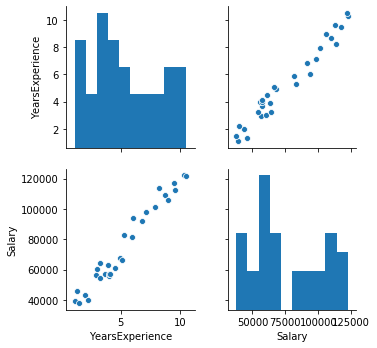

In [38]:
#plot visualization using MATPLOTLIB python package 
#co-relation of all the columns
sns.pairplot(SALARY)  

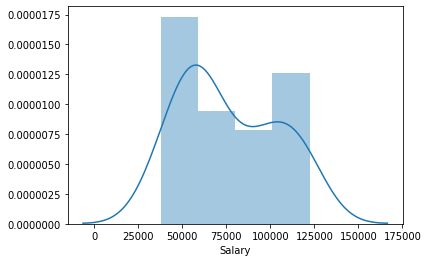

In [37]:
#distributed plot
sns.distplot(SALARY['Salary'])

In [39]:
#Find corelation
SALARY.corr()
corr=SALARY.corr()

In [40]:
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


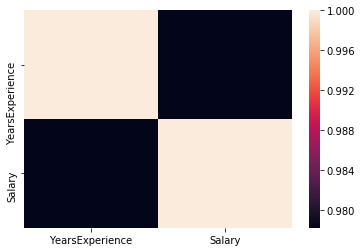

In [41]:
#Represent by heat map
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [47]:
X = SALARY[['YearsExperience']]
Y = SALARY['Salary']

In [49]:
#X

In [51]:
#Y

In [52]:
# Split the data into a training set and a testing set. 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [53]:
# ## Creating and Training the Model

from sklearn.linear_model import LinearRegression
#lm = LinearRegression(normalize=True)
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Evaluate the model by checking out it's coefficients and how we can interpret them.

#print the intercept
#print(lm.intercept_)
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
#pd.DataFrame(lm.coef_,X.columns)

,Coefficient
YearsExperience,9440.463834


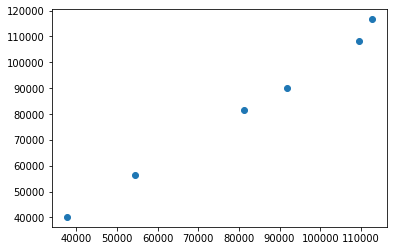

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

In [55]:
#test
# Get predictions off our test set and plot

predictions = lm.predict(X_test)
plt.scatter(Y_test,predictions)
plt.show()
predictions

In [57]:
#test
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1907.5525554956257
MSE: 4934969.878489006
RMSE: 2221.4792095558773


In [58]:
#test
r2_test=lm.score(X_test,Y_test)
r2_test

0.993422386435995

In [59]:
#test
#Other way of finding R Square
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.993422386435995

In [60]:
#test
adjr2_test=1-((1-r2_test)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
adjr2_test

0.9917779830449938

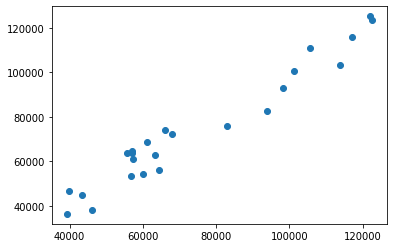

array([115724.47407705,  74186.43320901, 111004.24216023, 123276.84514397,
        62857.87660864,  44920.99532471,  38312.67064116,  82682.85065929,
       100619.73194322,  63801.922992  ,  53417.41277499,  68522.15490882,
        36424.57787443,  93067.3608763 ,  46809.08809144,  56249.55192509,
        64745.96937537,  60969.78384191,  72298.34044228, 125164.93791069,
       103451.87109331,  54361.45915836,  76074.52597574,  63801.922992  ])

In [61]:
#Train dataset
# Get predictions off our train data set and also check the consistency in errors, R2,Adj R2

predictions_Train = lm.predict(X_train)
plt.scatter(Y_train,predictions_Train)
plt.show()
predictions_Train

In [62]:
#train Dataset
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_train, predictions_Train))
print('MSE:', metrics.mean_squared_error(Y_train, predictions_Train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, predictions_Train)))

MAE: 5345.21969936921
MSE: 37904533.03756702
RMSE: 6156.665740282399


In [63]:
#train Dataset
r2_train=lm.score(X_train,Y_train)
r2_train

0.9467662384202531

In [64]:
#train dataset
#Other way of finding R Square
from sklearn.metrics import r2_score
r2_score(Y_train, predictions_Train)

0.9467662384202531

In [65]:
#train dataset
adjr2_train=1-((1-r2_train)*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))
adjr2_train

0.9443465219848101